## Spectral Clustering and Semi-Supervised Learning

#### This notebook contains different values and imports that can be used in this practical session.
#### Please keep the same variable names when provided in your report to make the work of teaching assistants easier. 
#### You can still change the values given or the sizes of the datasets treated if you believe it is useful to illustrate your point.

#### You can directly edit the markdown boxes to add your comments and answers to the questions

In [2]:
# Question 1 (imports and advised values):
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n_samples = 200 # You can change these values
noise_level_list = [.001,.1,.5] # You can change these values
colorcool=plt.cm.cool
title_list=['Noisy Moon, Noise=0.001', 'Noisy Moon, Noise=0.1', 'Noisy Moon, Noise=0.5']

### Question 1 : Complete the code in the box below

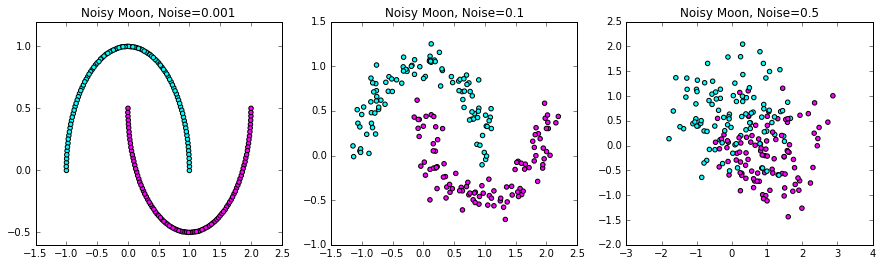

In [3]:
noisy_moons=[]
X=[]
Y=[]
colorcool=plt.cm.cool

plt.figure(figsize=(15.0, 4.0))
for k in range (len(noise_level_list)):
    noisy_moons.append(make_moons(n_samples,noise=noise_level_list[k]))
    X.append(noisy_moons[k][0])  #list of coordinates
    Y.append(noisy_moons[k][1])  #list of labels
    plt.subplot(1, 3, k+1)
    plt.scatter(X[k][:,0],X[k][:,1],c=Y[k],cmap=colorcool)
    plt.title(title_list[k])


### Question 2 : Complete the code in the box below

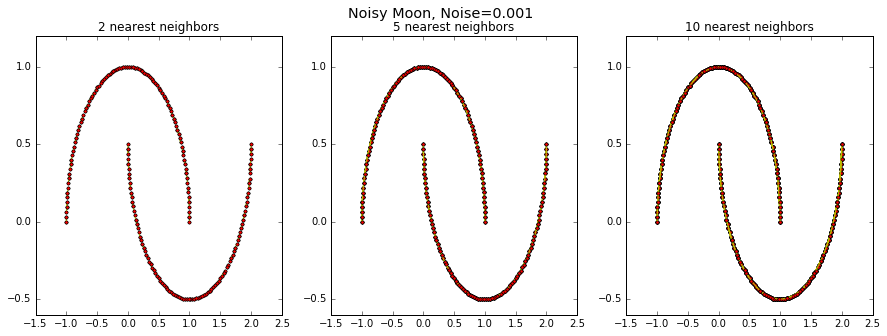

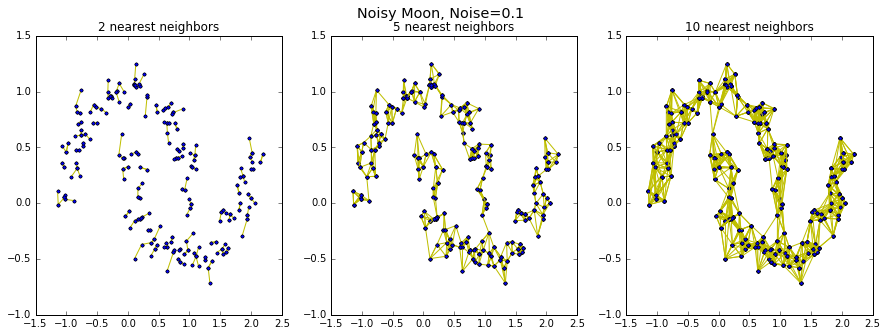

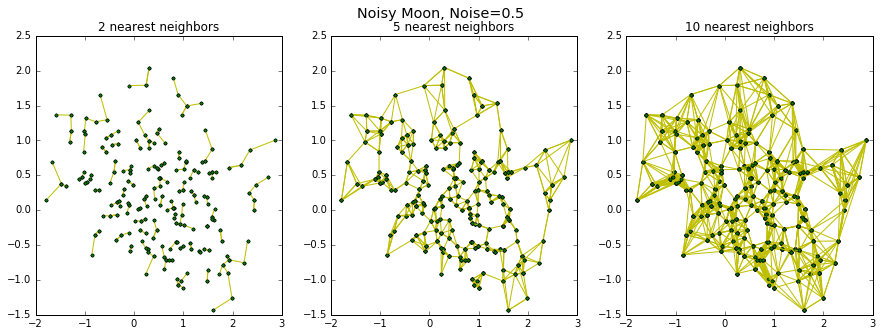

In [4]:
from sklearn.neighbors import kneighbors_graph,NearestNeighbors
n_neighbors_list = [2,5,10] # You can change these 

subtitle_list=['2 nearest neighbors', '5 nearest neighbors', '10 nearest neighbors']

color_list=['red', 'blue', 'green']

#Adjacency Matrix
A=[]

for i in range(len(noisy_moons)):
    
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    
    for j in range(len(n_neighbors_list)):
        #We fit t
        neigh = NearestNeighbors(n_neighbors=n_neighbors_list[j])
        neigh.fit(X[i])
        A=neigh.kneighbors_graph(X[i])
        A.toarray()
        
        edges=[]
        for k in range (A.shape[0]):
            for l in range (A.shape[0]):
                if A[k,l]==1.0:
                    edges.append([k,l])
                else:
                    pass
                
        edges=np.array(edges)
        x=X[i][:,0].flatten()
        y=X[i][:,1].flatten()

        plt.subplot(1, 3, j+1)
        plt.plot(x[edges.T],y[edges.T],linestyle='-',color='y',markerfacecolor=color_list[i],markersize=3,marker='o')
        plt.title(subtitle_list[j])
    
    fig.suptitle(title_list[i], fontsize="x-large")
plt.show()


### Question 3 : Optimization problem 

The optimization problem is the following : 

\begin{equation*}
vol(V)= f^{T} Df
\end{equation*}

\begin{equation*}
(Df)^{T}1= 0
\end{equation*}

\begin{equation*}
f^{T}Lf=vol(V)Ncut(A,B)
\end{equation*}

And we need to solve :

\begin{equation*}
min_{f€R^{N}} \frac{f^{T}Lf}{f^{T}Df} 
\end{equation*}

subject to 
\begin{equation*}
f^{T}D1_{n}=0
\end{equation*}


### Question 4 : Run the two-ways spectral clustering algorithm on each graph


C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


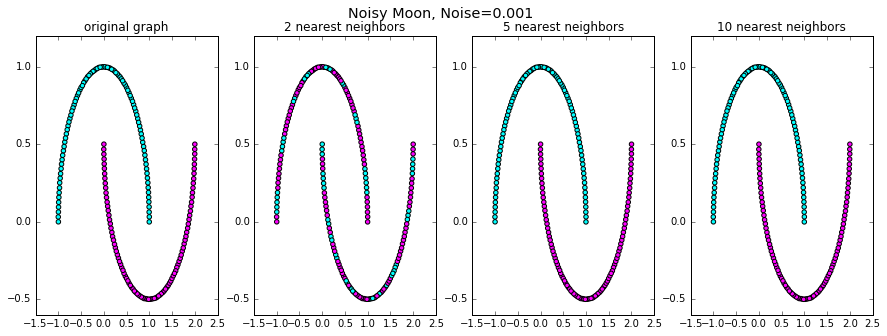

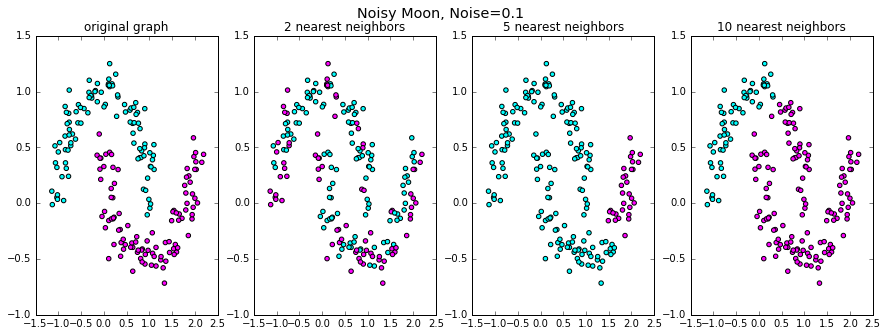

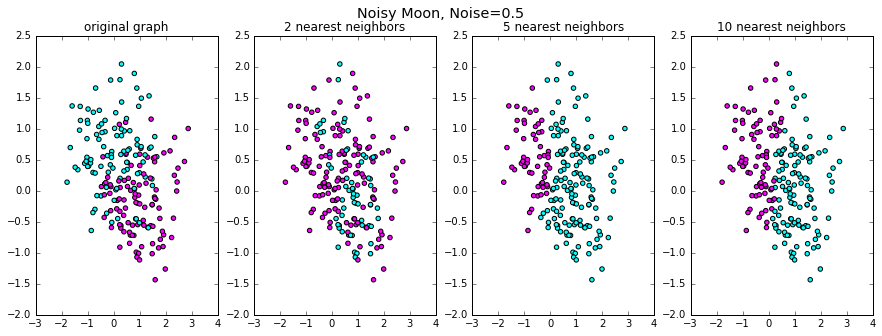

In [5]:
#For each row, the first graph is the real clusters, 
#the others are representation of the clustering using 
#the spectral clustering alogrithm for different nearest neighbors values

from sklearn.cluster import SpectralClustering
n_neighbors_list = [2,5,10] # You can change these 

subtitle_list=['original graph','2 nearest neighbors', '5 nearest neighbors', '10 nearest neighbors']

for i in range(len(noisy_moons)):
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,4,1)
    plt.scatter(X[i][:,0], X[i][:,1], c=Y[i], cmap=plt.cm.cool)
    plt.title(subtitle_list[0])
    labels=[]
    for j in range(len(n_neighbors_list)):
        model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',n_neighbors=n_neighbors_list[j])
        model.fit(X[i])
        labels.append(model.labels_)        
        plt.subplot(1, 4, j+2)
        plt.title(subtitle_list[j+1])        
        ax=plt.scatter(X[i][:,0], X[i][:,1], c=labels[j], cmap=plt.cm.cool)
        #ax.title.set_text(title_list[j])
        #plt.subplot.suptitle(subtitle_list[j])
    
    fig.suptitle(title_list[i], fontsize="x-large")
plt.show()


We apply the two-ways spectral clustering for different levels of noise : [0.001 ; 0.1 ; 0.5].

We notice that the greater the number k of nearest neighbors, the clearer the graphical split between two clusters
For k=2, we notice that there is no split as the two clusters seem "messy" graphically speaking.
For k=10, we notice a clear graphical split between the two labels (the two colors)

This is true both for the non-noisy dataset and the noisy dataset. 

### Question 5 : Stability Method of the clustering algorithm

In [6]:
#We introduce the dotproduct for the computation of similarity
def dotproduct(A,B):
    sum=0
    for i in range((A.shape)[0]):
        for j in range ((A.shape)[1]):
            sum=sum+A[i][j]*B[i][j]
    return sum

#Matrices to test the code
A=np.array([[1,1,1],[1,1,1],[1,1,1]])
B=np.array([[1,0,0],[1,1,1],[1,1,1]])

#Computation of similarity between two representation matrices
def similarity(A,B):
    num=dotproduct(A,B)
    denum=np.sqrt(dotproduct(A,A)*dotproduct(B,B))
    return num/denum

#Computation test
similarity(A,B)


0.88191710368819687

In [7]:
#Computation of the matrix representation C[i][j] 
def compute_C(clustering):    
    elements = {}
    for element in set(clustering):
        elements[element] = []
        for i in range(len(clustering)):
            if clustering[i] == element:
                elements[element].append(i)
    C = np.zeros((len(clustering), len(clustering)))
    for i in elements.keys():
        for j in range(len(elements[i])):
            for k in range(len(elements[i])):
                C[j, k] = 1
    return C

In [8]:
# Create initial dataset
n_samples = 200
noise = 0.001

X = make_moons(n_samples = n_samples, noise = noise)[0]

In [28]:
def stability(cluster_algo,dataset,B,C):
    f = 0.8 # Partition of the bootstrap
    Stab=[] #Stability Array
    X=dataset 
    bootstrap = [] 
              
    # clustering for initial X
    model=cluster_algo(n_clusters=C)
    model.fit(X)
    clustering_X = model.fit_predict(X)
            
    # clustering for boostrapped partition
    for i in range(B):           
            
        # Bootstrap on the initial dataset
            idx = np.random.randint(len(X),size=f*len(X))
            bootstrap.append(X[idx, :])
            model.fit(bootstrap[i])
            
             #affinity = model.affinity_matrix_
            clustering_bootstrap = model.fit_predict(bootstrap[i])
            C_bootstrap = compute_C(clustering_bootstrap)
                                    
            # We take the same points in initial as in the bootstrapped to have the 
            # same number of points
            C_initial = compute_C(clustering_X[idx])
                             
            #Returns an array of similarity
            #i is the number of subsamples
            #j is the number of k-neighbors used in the method
            Stab.append(similarity(C_bootstrap, C_initial))
      
    return Stab

In [29]:
#We create a function to initialize the different spectral clustering algorithms

def __initSpectral__(self, n_clusters, affinity, n_neighbors):
        self.n_clusters = n_clusters
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        

Here, the stability method returns a similarity array of size(B). B is the number of bootstrap samples.

The array represents the similarity of the representation matrices of the complete sample and the "bootstrap" sample, using the clustering algorithm for a given k number of neighbors.
The columns represent the similarities for the different B number of bootstrap samples.

We create a function to initialize the number of k-neighbors used in a given Spectral Clustering algorithm. This is useful to assess the impact of k in the stability of the Spectral Clustering algorithm.

### Question 6 : Stability of the Spectral Clustering Algorithm

In [30]:
#We now create a non-noisy dataset with the number of clusters C=2
n_samples = 200
noise = 0.001
Xnoiseless = make_moons(n_samples = n_samples, noise = noise)[0]

#Run the Stability Method        
B = 20  #number of subsamples
C = 2  #number of clusters
k=20 #maximum number of neighbors 

S=[]

#We create an array S, with the stability measures obtanied for the B number of bootstraps
#for a number of neighbors between 0 and k
for i in range (k):
    __initSpectral__(SpectralClustering,n_clusters=C,n_neighbors=k,affinity='nearest_neighbors')

    S.append(stability(SpectralClustering,Xnoiseless,B,C)) 
   

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


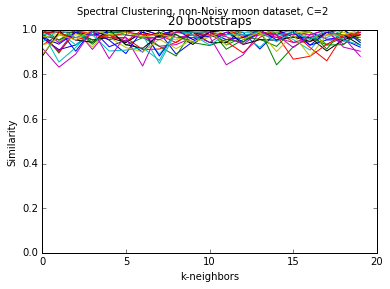

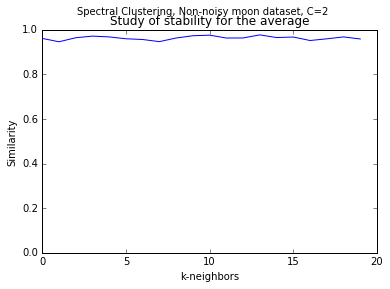

In [31]:
#We draw the similarity measures for the bootstrap for the non-noisy dataset
for i in range(B):
    plt.plot(S[i])
    plt.xlabel('k-neighbors')
    plt.ylabel('Similarity')
    plt.ylim(0,1)
    plt.suptitle('Spectral Clustering, non-Noisy moon dataset, C=2 ')
    plt.title('20 bootstraps')
plt.show()

#We want to draw the average for the 20 bootstraps
avg=[]
avg.append(np.mean(S, axis=0))
avg=np.asarray(avg)

plt.plot(avg[0])
plt.xlabel('k-neighbors')
plt.ylabel('Similarity')
plt.ylim(0,1)
plt.suptitle('Spectral Clustering, Non-noisy moon dataset, C=2 ')
plt.title('Study of stability for the average')

plt.show()


We notice the average stability for the B number of bootstraps is very important, regardless of the k number of neighbors used in the spectral clustering algorithm.

We now study the stability for 20 bootstraps of a noisy dataset


In [32]:
#We now create a noisy dataset with the number of clusters C=2
n_samples = 200
noise = 0.2
Xnoise = make_moons(n_samples = n_samples, noise = noise)[0]


S=[]
for i in range (k):
    __initSpectral__(SpectralClustering,n_clusters=C,n_neighbors=k,affinity='nearest_neighbors')

    S.append(stability(SpectralClustering,Xnoiseless,B,C)) 
    

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


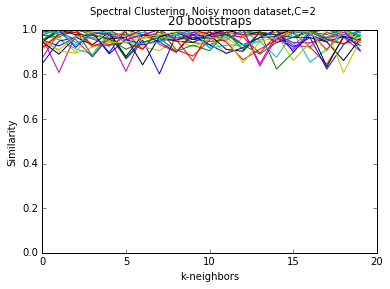

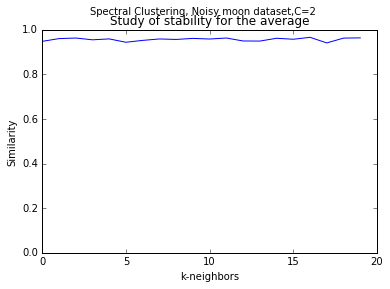

In [33]:
#We draw the similarity measures for the bootstrap for the non-noisy
for i in range(B):
    plt.plot(S[i])
    plt.xlabel('k-neighbors')
    plt.ylabel('Similarity')
    plt.ylim(0,1)
    plt.suptitle('Spectral Clustering, Noisy moon dataset,C=2 ')
    plt.title('20 bootstraps')
plt.show()

#We want to draw the average for the 20 bootstraps
avg=[]
avg.append(np.mean(S, axis=0))
avg=np.asarray(avg)

plt.plot(avg[0])
plt.xlabel('k-neighbors')
plt.ylabel('Similarity')
plt.ylim(0,1)
plt.suptitle('Spectral Clustering, Noisy moon dataset,C=2 ')
plt.title('Study of stability for the average')

plt.show()



Given C=2, we notice that the spectral clustering algorithm is very stable, both for noisy and non-noisy datasets. 

For a number B=30 of bootstraps, we have computed the similarity average. We notice that the similarity average is always higher than 0.9, regardless of the hyperparameter k of neighbors in the spectral clustering algorithm.

Thus, the stability criterion does not help to choose k, as k does not seem to impact the stability.

### Question 7 : Stability of the Hierarchial Clustering Algorithm

In [34]:
from sklearn.cluster import AgglomerativeClustering

#We create a function to initialize the Hierarchical Clustering algorithm, with the right affinity and linkage
def __initAgglomerative__(self,affinity='euclidean',linkage='ward'):
        self.affinity=affinity
        self.linkage=linkage


In [35]:
#Run the Stability Method        
B = 100  #number of subsamples
C = 2  #number of clusters

__initAgglomerative__(AgglomerativeClustering,affinity='cosine',linkage='ward')

S1=stability(AgglomerativeClustering,Xnoiseless,B,C) 
print("The average stability for 100 bootstrap samples of a non-noisy dataset using the hierarchichal clustering is :" ,np.mean(S1,axis=0))


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The average stability for 100 bootstrap samples of a non-noisy dataset using the hierarchichal clustering is : 0.819314376129


In [36]:
S2=stability(AgglomerativeClustering,Xnoise,B,C)
print("The average stability for 100 bootstrap samples of a noisy dataset using the hierarchichal clustering is :" ,np.mean(S2,axis=0))



C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The average stability for 100 bootstrap samples of a noisy dataset using the hierarchichal clustering is : 0.926345180786


We compute the average stability for 100 bootstrap samples compared to the original dataset. We use the hierarchical clustering algorithm with the euclidean distance. 

For a non-noisy dataset,we notice that the average stability for 100 bootstraps is about 82-90%. For a noisy dataset, we notice that the average stability for 100 bootstraps is also about 82-90%. 

The stability is high with the hierarchical clustering algorithm, but not as high as for the spectral clustering algorithm. Moreover, with the spectral clustering algorithm, we do not notice any stark difference in the average stability for noisy or non-noisy datasets. In both case, the stability is around 95-98%.

We also notice that changing the distance used in the hierarchical clustering algorithm (l1,l2,manhattan,cosine) does not impact much the average stability of the algorithm.

### Experiment on MNIST

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[  0.   0.   0.   8.  15.   1.   0.   0.   0.   0.   0.  12.  14.   0.   0.
   0.   0.   0.   3.  16.   7.   0.   0.   0.   0.   0.   6.  16.   2.   0.
   0.   0.   0.   0.   7.  16.  16.  13.   5.   0.   0.   0.  15.  16.   9.
   9.  14.   0.   0.   0.   3.  14.   9.   2.  16.   2.   0.   0.   0.   7.
  15.  16.  11.   0.]
Affichage de la classe / chiffre associé:
6


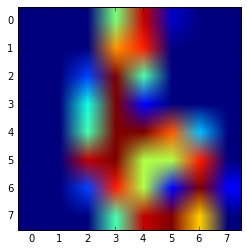

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

# Choix d'une observation quelconque de la base
idx_to_test = 16

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

# Utilisation de la fonction imshow pour l'affichage de l'image numéro idx_to_test:
imgplot = plt.imshow(np.reshape(X[idx_to_test,:], (8, 8)))

## Semi-Supervised Learning

Choice of the dataset used : **Precise** which dataset you chose and why it is relevant for the semi-supervised learning Task

Advised datasets :

*Breast Cancer Wisconsin (Diagnostic) Database*

*MNIST binary even vs odd (multiple clusters inside each class)*

Feel free to use other datasets if they are relevant

In [38]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split

### For all the next questions, use Cancer and Mnist classes to handle your data if you choose to use these one,
### You can also add more datasets but we advise you to handle them with this class for better readability
class semi_sup_dat:
    def __init__(self,data,p_unlabelled,name):
        # DON T CHANGE THE RANDOM STATES
        self.name = name
        if self.name == 'Mnist':
            # do an even vs odd binary classification :
            even = [0,2,4,6,8]
            Y = [int(y in even) for y in data.target]
        else:
            Y = data.target
        X_lab, X_unlab, y_lab, y_unlab = train_test_split(data.data, data.target, test_size=p_unlabelled, random_state=32)
        self.X_lab = X_lab
        self.X_unlab = X_unlab
        self.y_lab = np.array(y_lab)
        self.y_unlab = np.array(y_unlab)


# The following lines can be called later in the code to build a dataset with varying unlabelled proportion
p_unlabelled = 0.8 # You can change this value
Cancer = semi_sup_dat(load_breast_cancer(), p_unlabelled,'Cancer')
digits = load_digits()
Mnist = semi_sup_dat(load_digits(), p_unlabelled,'Mnist')

#print(Cancer.X_lab)

### Question 9 : Self-training Algorithm

We test the self-training algorithm on a noisy moon dataset :

(40, 2)
(160, 2)
(40, 2)


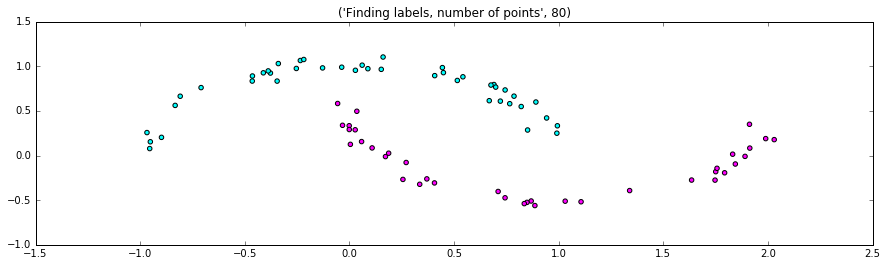

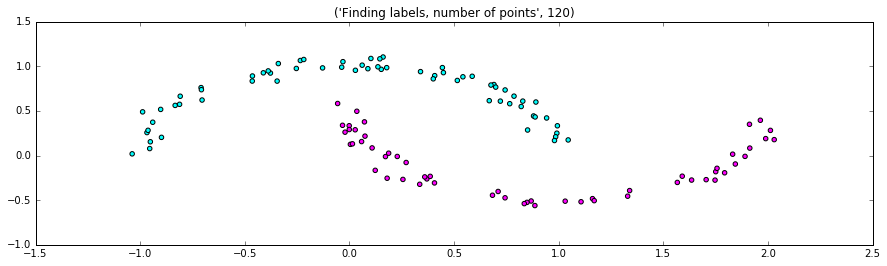

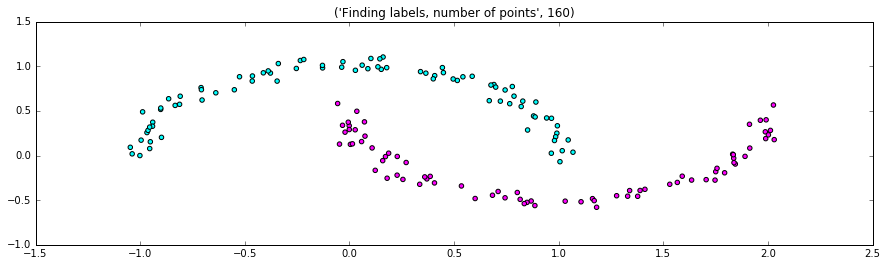

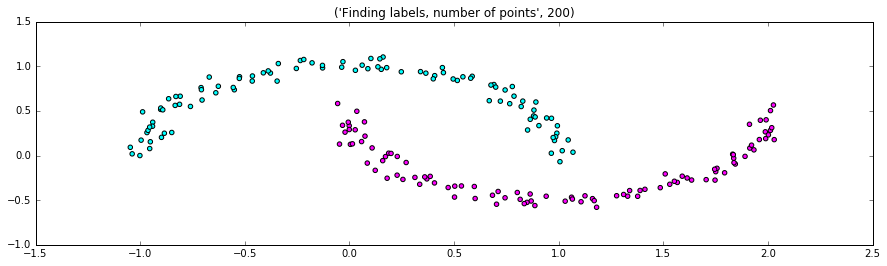

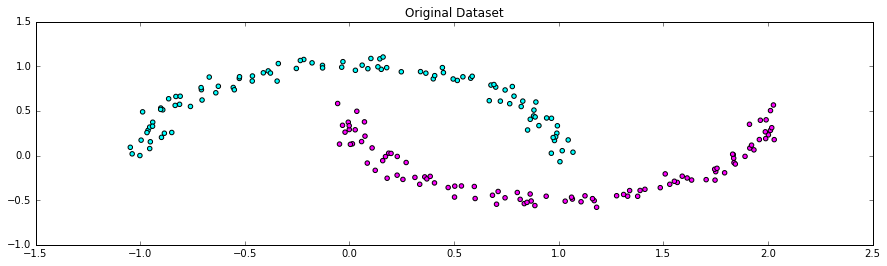

In [39]:
#  Question 9  : Complete the function self_training
from sklearn.neighbors import KNeighborsClassifier


def self_train_algo(X_lab, y_lab, X_unlab):
    
    X_lab_train=X_lab.copy()
    y_lab_train=y_lab.copy()
    y_unlab_pred=[]
       
    for i in range(X_unlab.shape[0]):
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_lab_train, y_lab_train)
        y=neigh.predict([X_unlab[i]])
        #We had the predicted data to the dataset :
        X_lab_train = np.append(X_lab_train, [X_unlab[i]], axis=0)
        y_lab_train = np.append(y_lab_train, y, axis=0)
        y_unlab_pred.append(y)
        
    return X_lab_train, y_lab_train, y_unlab_pred

#Test on the noisy moons
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
#X_true and Y_true are the real coefficients and labels
X_true=noisy_moons[0]
Y_true=noisy_moons[1]

#Test size
f=0.80

X_lab_moon, X_unlab_moon, y_lab_moon, y_unlab_moon = train_test_split(noisy_moons[0], noisy_moons[1], test_size=f, random_state=32)
print(X_lab_moon.shape)
print(X_unlab_moon.shape)
X_lab_train_moon, y_lab_train_moon = X_lab_moon.copy(), y_lab_moon.copy()
print(X_lab_train_moon.shape)

for i in range(X_unlab_moon.shape[0]):
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(X_lab_train_moon, y_lab_train_moon)
        y=neigh.predict([X_unlab_moon[i]])
        X_lab_train_moon = np.append(X_lab_train_moon, [X_unlab_moon[i]], axis=0)
        y_lab_train_moon = np.append(y_lab_train_moon, y)

        if i % 40 == 39:
            plt.figure(figsize=(15.0, 4.0))
            plt.title(('Finding labels, number of points',X_lab_train_moon.shape[0]))
            plt.scatter(X_lab_train_moon[:,0],X_lab_train_moon[:,1], c=y_lab_train_moon, cmap=plt.cm.cool)
            plt.show()

plt.figure(figsize=(15.0, 4.0))
plt.scatter(X_true[:,0],X_true[:,1],c=Y_true,cmap=plt.cm.cool)
plt.title('Original Dataset')
plt.show()


We notice that the figure is identically replicated in the above case.

### Question 10 : LapRLS using the closed-form

###### Closed form expression :

The Laplacian regularized least square algorithm solves the optimization problem with the squared loss function :
\begin{equation*}
\min_{f\in H_{k}} \frac{1}{l}\sum\limits_{i=1}^l (y_{i}-f(x_{i}))^2 +\lambda\lVert f \rVert_{H_{k}}+\frac{\lambda_{u}}{u+l}^2f^{T}Lf
\end{equation*}

With the representer theorem, with  we find the following expression for f : 
\begin{equation*}
f^{*}(.)=\sum\limits_{i=1}^{l+u} K(.,x_{i})\alpha_{i}^{*}
\end{equation*}

By substituting this in the equation above, with K the gram matrix of size (l,l) of the kernel function, Y is the label vector and J a diagonal matrix of size (l+u,l+u) with its l first diagonal entries equal to 1 and the rest equal to 0, we find the following ($\alpha$ is of dimension l+u):
\begin{equation*}
\alpha^{*}=argmin \frac{1}{l}(Y-JK\alpha)^{T}(Y-JK\alpha)+\lambda\alpha^{T}K\alpha+\frac{\lambda_u}{(u+l)^2}\alpha^{T}KLK\alpha
\end{equation*}


We find the following solution, after computing the derivative :
\begin{equation*}
\alpha^{*}=(JK+\lambda l I+\frac{\lambda_{u} l}{(u+l)^2}LK)^{-1}Y
\end{equation*}

###### Algorithm : 

In [40]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel  # Or reimplement it yourself if your prefer
from scipy.linalg import block_diag, inv

def randomness(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
    return X_train, Y_train


#We train the algorithm on a training dataset and test it on the X_test dataset
def LapRLS(kernel_func, X_lab, X_unlab, y_lab, lbda, lbda_u, nearest_neighbors, X_test):
    
    X=np.vstack([X_lab,X_unlab])
    l = X_lab.shape[0]
    n = X.shape[0]
    
    #Built the kernel matrix
    K = kernel_func(X, X)
    
    #Build the matrix J
    J = block_diag(np.identity(l), np.zeros((n-l,n-l)))
       
    #Build Y, label matrix
    Y = np.zeros(n)
    for i in range(l):
        Y[i] = y_lab[i]
    
    #Build L, the laplacian matrix
    neigh = NearestNeighbors(n_neighbors=nearest_neighbors)
    neigh.fit(X)
    A = neigh.kneighbors_graph(X)
    W = A.toarray()
    #the following changes are made because W the adjacency marix has to be symetric
    W = W + W.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if W[i][j]>1:
                W[i][j]=1

    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i][i] += W[i][j]
            pass
        pass
    
    L = D-W
    
    alpha = np.zeros(n)
    alpha = np.dot(inv(np.dot(J,K) + lbda * l * np.identity(n) + lbda_u * l * np.dot(L, K)/(n**2)), Y)
    
    f = np.zeros(X_test.shape[0])
    
    #Return the optimal value for f
    for i in range(X_test.shape[0]):
        for j in range(n):
            f[i]+=kernel_func([X_test[i, :]],[X[j, :]])*alpha[j]
    return f

### Question 11.a. : Testing the algorithm on a toy dataset with gaussian kernel

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


#Testing the efficiency of the algorithm for different level of noise

for i in range(len(noise_level_list)):

    #Using a "toy dataset" (noisy moon) to test our algorithm
    toy_dataset = make_moons(n_samples=n_samples, noise=noise_level_list[i])

    #Spliting the dataset between training data and testing data
    X_train_moon, X_test_moon, y_train_moon, y_test_moon=train_test_split(toy_dataset[0], toy_dataset[1], test_size=0.2, random_state=32)

    #Spliting the training dataset between labeled and unlabeled data
    X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, y_unlab_train_moon = train_test_split(X_train_moon, y_train_moon, test_size=0.8, random_state=32)

    lap=LapRLS(rbf_kernel, X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, 0.1, 1., 5, X_test_moon)

    f=np.zeros(lap.shape[0])
    for j in range(lap.shape[0]):
        if lap[j]<0.5:
            f[j]=int(0)
        else:
            f[j]=int(1)

    # Evaluation of the prediction
    print ("Level of noise =", noise_level_list[i])
    print (classification_report(y_test_moon, f))
    print ("The accuracy score is {:.2%}".format(accuracy_score(y_test_moon, f)))

Level of noise = 0.001
             precision    recall  f1-score   support

          0       0.79      0.96      0.86        23
          1       0.92      0.65      0.76        17

avg / total       0.84      0.82      0.82        40

The accuracy score is 82.50%
Level of noise = 0.1
             precision    recall  f1-score   support

          0       0.65      0.88      0.75        17
          1       0.88      0.65      0.75        23

avg / total       0.78      0.75      0.75        40

The accuracy score is 75.00%
Level of noise = 0.5
             precision    recall  f1-score   support

          0       0.67      0.84      0.74        19
          1       0.81      0.62      0.70        21

avg / total       0.74      0.72      0.72        40

The accuracy score is 72.50%


We see that the noisier the noisy-moon dataset is, the less accurate the clasification is.

### Question 11.b. : Testing the LapRLS algorithm on a real dataset (Cancer)

In [42]:
#Testing the efficiency of the algorithm on a real dataset (Cancer)

#Spliting the training dataset between training and testing data
X_lab_train_cancer, X_lab_test_cancer, y_lab_train_cancer, y_lab_test_cancer = train_test_split(Cancer.X_lab, Cancer.y_lab, test_size=0.2, random_state=32)

lap_cancer = LapRLS(polynomial_kernel, X_lab_train_cancer, Cancer.X_unlab, y_lab_train_cancer, .1, .01, 5, X_lab_test_cancer)

f_cancer=np.zeros(lap_cancer.shape[0])
for i in range(lap_cancer.shape[0]):
    if lap_cancer[i]<0.5:
        f_cancer[i]=int(0)
    else:
        f_cancer[i]=int(1)

# Evaluation of the prediction
print(classification_report(y_lab_test_cancer, f_cancer))
print ("The accuracy score is {:.2%}".format(accuracy_score(y_lab_test_cancer, f_cancer)))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       0.95      1.00      0.97        19

avg / total       0.96      0.96      0.95        23

The accuracy score is 95.65%


We chose to use the polynomial kernel instead of the Gaussian one, because results were much more accurate with it

In [43]:
#Testing different values of lbda_u
lbda_u_list=[0., 0.01, 0.1, 1.]

#Using a "toy dataset" (noisy moon) to test our algorithm
toy_dataset = make_moons(n_samples=n_samples, noise=0.5)

#Spliting the dataset between training data and testing data
X_train_moon, X_test_moon, y_train_moon, y_test_moon=train_test_split(toy_dataset[0], toy_dataset[1], test_size=0.2, random_state=32)

#Spliting the training dataset between labeled and unlabeled data
X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, y_unlab_train_moon = train_test_split(X_train_moon, y_train_moon, test_size=0.8, random_state=32)


for i in range(len(lbda_u_list)):
    
    lap=LapRLS(polynomial_kernel, X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, 1., lbda_u_list[i], 5, X_test_moon)

    f=np.zeros(lap.shape[0])
    for j in range(lap.shape[0]):
        if lap[j]<0.5:
            f[j]=int(0)
        else:
            f[j]=int(1)
    
    print ("LapRLS with lbda_u =", lbda_u_list[i])
    print (classification_report(y_test_moon, f))

LapRLS with lbda_u = 0.0
             precision    recall  f1-score   support

          0       0.56      0.90      0.69        20
          1       0.75      0.30      0.43        20

avg / total       0.66      0.60      0.56        40

LapRLS with lbda_u = 0.01
             precision    recall  f1-score   support

          0       0.56      0.90      0.69        20
          1       0.75      0.30      0.43        20

avg / total       0.66      0.60      0.56        40

LapRLS with lbda_u = 0.1
             precision    recall  f1-score   support

          0       0.56      0.90      0.69        20
          1       0.75      0.30      0.43        20

avg / total       0.66      0.60      0.56        40

LapRLS with lbda_u = 1.0
             precision    recall  f1-score   support

          0       0.56      0.90      0.69        20
          1       0.75      0.30      0.43        20

avg / total       0.66      0.60      0.56        40



**Comments**

We do not notice any influence of $\lambda_{u}$ in the precision, recall and f1-score, which seems odd.

### Question 12 : Limitations of a closed-form solution implementation

The limitations of closed-form solution implementation are that it takes longer to compute as we need to compute the inverse of a large matrix.


### Question 13 : Stochastic Gradient Descent LapRLS

We saw that with the closed-form the problem can be written as following :
\begin{equation*}
\alpha^{*}=argmin \frac{1}{l}(Y-JK\alpha)^{T}(Y-JK\alpha)+\lambda\alpha^{T}K\alpha+\frac{\lambda_u}{(u+l)^2}\alpha^{T}KLK\alpha= g(\alpha)
\end{equation*}

Then to use the SGD algorithm we nee to calculate the gradient of $g$ :
\begin{equation*}
\nabla g(\alpha)= \frac{1}{l}(Y-JK\alpha)^T(-JK)+(\lambda K + \frac{\lambda_u l}{(u+l)^2} KLK)\alpha
\end{equation*}

We have tried to implement the below LapRLS_SGD code. Yet, the coefficients obtained for $\alpha$ are very small, which returns very small labels. We couldn't find a threshold to split the data.

In [44]:
def LapRLS_SGD(n_iter, step, kernel_func, X_lab, X_unlab, y_lab, lbda, lbda_u, nearest_neighbors, X_test):
    
    X = np.vstack([X_lab,X_unlab])
    l = X_lab.shape[0]
    n = X.shape[0]
    x_init=np.zeros(X.shape[0])
    
    #Built the kernel matrix
    K = kernel_func(X, X)
    
    #Build the matrix J
    J = block_diag(np.identity(l), np.zeros((n-l,n-l)))
    
    #Build Y, label matrix
    Y = np.zeros(n)
    for i in range(l):
        Y[i] = y_lab[i]
    
    #Build L, the laplacian matrix
    neigh = NearestNeighbors(n_neighbors=nearest_neighbors)
    neigh.fit(X)
    A = neigh.kneighbors_graph(X)
    W=A.toarray()
     #the following changes are made because W the adjacency marix has to be symetric
    W = W + W.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if W[i][j]>1:
                W[i][j]=1

    
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i][i] += W[i][j]
            pass
        pass
    
    L = D-W
    
    alpha = np.zeros(n)
    
    iis = np.random.randint(0, n, n * n_iter) 

    #Apply the Stochastic Gradient Descent Method to get alpha value
    for idx in range(n_iter):
        i = iis[idx]
        grad_i = 1/l * np.dot((Y[i] - np.dot(np.dot(J[i], K[i]), alpha)).T, np.dot(-J[i],K[i]))+np.dot((lbda * K[i] + lbda_u*l/(n)**2 * np.dot(np.dot(K[i], L[i]), K[i])), alpha)
        alpha = alpha - step*grad_i/(idx+1)**0.5
    
    f = np.zeros(X_test.shape[0])
    
    #Return the optimal value of the label for each element of the test dataset
    for i in range(X_test.shape[0]):
        for j in range(n):
            f[i]+=kernel_func([X_test[i, :]],[X[j, :]])*alpha[j]
    
    return f

In [45]:
n_iter = 50
step = 1.

lap = LapRLS_SGD(n_iter, step, rbf_kernel, X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, .1, 0.1, 5, X_test_moon)

f = np.zeros(lap.shape[0])
for j in range(lap.shape[0]):
    if lap[j]<0.5:
        f[j]=int(0)
    else:
        f[j]=int(1)
        
print (classification_report(y_test_moon, f))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67        20
          1       0.00      0.00      0.00        20

avg / total       0.25      0.50      0.33        40



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Question 14 : LapSVM - Laplacian Support Vector Machines

##### Add your answer to the question here :

We now work on LapSVM, which minimizes : 
\begin{equation*}
\min_{f\in H_{k}} \frac{1}{l}\sum\limits_{i=1}^l (1-y_{i} f(x_{i})) +\lambda\lVert f \rVert_{H_{k}}+\frac{\lambda_{u}^2}{u+l}f^{T}Lf
\end{equation*}

With the representer theorem, we find the following expression for f : 
\begin{equation*}
f^{*}(.)=\sum\limits_{i=1}^{l+u} K(.,x_{i})\alpha_{i}^{*}
\end{equation*}

Then, by applying Lagrangian duality with $\beta_{i},\zeta_{i}$ and formulating a reduced Lagragian, we find :
\begin{equation*}
\alpha=(2\lambda I+2\frac{\lambda_{u}}{(u+l)^{2}}LK)^{-1}J^{T}Y\beta^{*}
\end{equation*}

When we substitute back in the Lagragian, we get : 
\begin{equation*}
\alpha=(2\lambda I+2\frac{\lambda_{u}}{(u+l)^{2}}LK)^{-1}J^{T}Y\beta^{*}
\end{equation*}

Where $\beta^*$ is the solution of the following quadratic problem :
\begin{equation}
\begin{aligned}
& \underset{\beta \in R^l }{\text{max}}
& &\sum_{i=1}^{l} \beta_i -\frac{1}{2} \beta^T Q\beta \\
& \text{s.t.} & &  0 \leq \beta_i \leq \frac{1}{l}   \forall i = 1..n\\
& & &  \sum_{i=1}^{} y_i\beta_i =0 \\
\end{aligned}
\end{equation}

And where Q is :
\begin{equation}
\begin{aligned}
Q=YJK(2\lambda I+2\frac{\lambda_u}{(l+u)^2}LK)^{-1}J^{T}Y
\end{aligned}
\end{equation}

****Implementation of the LapSVM algorithm:****


As for the gradient descent, we have had some difficulties to implement the LapSVM algorithm. The use of cvxopt.solvers only returns small values for $\beta$. Again, we cannot find a threshold to split the data.

In [46]:
from cvxopt import matrix, solvers
from numpy.linalg import inv

def LapSVM(kernel_func, X_lab, X_unlab, y_lab, lbda, lbda_u, nearest_neighbors, X_test):
           
    X = np.vstack([X_lab,X_unlab])
    l = X_lab.shape[0]
    n = X.shape[0]
    x_init=np.zeros(X.shape[0])
    
    #Built the kernel matrix
    K = kernel_func(X,X)
    
    #Build the matrix J
    J = np.zeros((l,n))
    for i in range(l):
        J[i][i]=1
    
    #Build Y, label matrix
    Y = np.zeros((l,l))
    for i in range(l):
        Y[i][i] = y_lab[i]
    
    #Build L, the laplacian matrix
    neigh = NearestNeighbors(n_neighbors=nearest_neighbors)
    neigh.fit(X)
    A = neigh.kneighbors_graph(X)
    W = A.toarray()
    W = W + W.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            if W[i][j]>1:
                W[i][j]=1
    
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i][i] += W[i][j]
            pass
        pass
    
    L = D-W
    
    #Solving the dual problem to find beta value
    #Build Q
    P = np.dot(np.dot(np.dot(np.dot(Y, J), K), inv(2 * lbda * np.identity(n) + 2*lbda_u/(n)**2 * np.dot(L, K))), np.dot(J.T, Y))
    P = P.astype(np.double)
    
    q = -np.ones(l)
    q = q.astype(np.double)
    
    G = np.vstack([np.identity(l), -np.identity(l)])
    G = G.astype(np.double)
    
    h = np.concatenate([1/l * np.ones(l),np.zeros(l)])
    h = h.astype(np.double)

    A = y_lab
    A = A.astype(np.double)
    
    b = np.zeros(1)
    
    sol = solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h), matrix(A).T, matrix(b))
    
    beta = sol['x']
    
    beta = np.squeeze(np.asarray(beta))
    alpha = np.zeros(n)
    alpha = np.dot(inv(2*lbda*np.identity(n) + 2*lbda_u/(n**2)*np.dot(L, K)), np.dot(J.T,np.dot(Y, beta)))
    
    f = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        for j in range(n):
            f[i] += kernel_func([X_test[i, :]],[X[j, :]])*alpha[j]

    return f, alpha, beta

ImportError: No module named 'cvxopt'

In [47]:
lap, alpha, beta = LapSVM(polynomial_kernel, X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, .1, 0.1, 5, X_test_moon)

f = np.zeros(lap.shape[0])
for j in range(lap.shape[0]):
    if lap[j]<0.5:
        f[j]=int(0)
    else:
        f[j]=int(1)

print (classification_report(y_test_moon, f))

NameError: name 'LapSVM' is not defined

**Comments**

As said before, results are not what we were expecting, the alpha coefficients are very small.. There must be an error in the calculation of beta.

### Question 15 : Comparison between Self-Training and LapRLS for a given dataset, with various percentages of labeled data.

In [50]:
test_size_list=[0.05,0.1,0.2,0.4]
n_samples=500

#Testing the efficiency of the algorithm for different level of noise

for i in range(len(test_size_list)):
    s=test_size_list[i]

    #Using a "toy dataset" (noisy moon) to test our algorithm
    toy_dataset = make_moons(n_samples=n_samples, noise=0.2)

    #Spliting the dataset between training data and testing data
    X_train_moon, X_test_moon, y_train_moon, y_test_moon=train_test_split(toy_dataset[0], toy_dataset[1], test_size=0.2, random_state=32)
    
    #Spliting the training dataset between labeled and unlabeled data
    X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, y_unlab_train_moon = train_test_split(X_train_moon, y_train_moon, test_size=(1-s), random_state=32)
  
    
    X_lab_train_self, y_lab_train_self, y_self= self_train_algo(X_lab_train_moon, y_lab_train_moon, X_unlab_train_moon) 
    y_self=np.asarray(y_self)
    print(("Self-Training with unlabeled size = {:.2%}".format(s)))
    print (classification_report(y_self, y_unlab_train_moon))
    print ("The accuracy score is {:.2%}".format(accuracy_score(y_self, y_unlab_train_moon)))
    
    #LapRLS
    lap=LapRLS(rbf_kernel, X_lab_train_moon, X_unlab_train_moon, y_lab_train_moon, 0.1, 1., 5, X_test_moon)

    f=np.zeros(lap.shape[0])
    for i in range(lap.shape[0]):
        if lap[i]<0.5:
            f[i]=int(0)
        else:
            f[i]=int(1)

    # Evaluation of the prediction
    print("LapRLS with unlabeled size = {:.2%}".format(s))
    print (classification_report(y_test_moon, f))
    print ("The accuracy score is {:.2%}".format(accuracy_score(y_test_moon, f)))

Self-Training with unlabeled size = 5.00%
             precision    recall  f1-score   support

          0       0.99      0.95      0.97       194
          1       0.95      0.99      0.97       186

avg / total       0.97      0.97      0.97       380

The accuracy score is 97.11%
LapRLS with unlabeled size = 5.00%
             precision    recall  f1-score   support

          0       0.85      0.96      0.90        54
          1       0.95      0.80      0.87        46

avg / total       0.90      0.89      0.89       100

The accuracy score is 89.00%
Self-Training with unlabeled size = 10.00%
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       187
          1       0.95      0.96      0.95       173

avg / total       0.96      0.96      0.96       360

The accuracy score is 95.56%
LapRLS with unlabeled size = 10.00%
             precision    recall  f1-score   support

          0       0.72      0.71      0.72        48
     

We notice, that the Self-Training algorithm tends to perform better than the LapRLS algorithm, regardless of the share of unlabeled data. 

We don't notice any correlation between the share of unlabeled data and the accuracy score for both tests, which seem odd. We thought we would have the following link : the higher the share of labeled data, the higher the accuracy score, for both tests